<a href="https://colab.research.google.com/github/sampson77/Winter_Assinment1/blob/main/Assignment1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn. linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

## Import Dataset


In [ ]:
df_HRcost = pd.read_csv('/content/Assignment1_Data.csv')
df_HRcost.head()

,Staff ID,Age,Purchased,YearsExperience,Salary,R&D Cost,HR Cost,Marketing Cost,Profit,TV,Radio,Newspaper,Sales
0,1006,31,0,11,80000,16000,10000,21000,62000,10.5,5.25,8.50,7.0
1,1007,29,0,8,62000,11000,8500,16000,52000,8.5,4.25,7.25,6.0
2,1008,36,0,13,85000,19000,11500,24000,66000,11.5,5.75,9.50,8.0
3,1009,32,1,10,68000,13000,9500,19000,57000,9.5,4.75,8.00,6.7
4,1010,40,1,14,90000,21000,12500,26000,72000,12.5,6.25,10.50,8.5


# (a) Data cleaning and checking for missing data

In [ ]:
colunm_data_types = df_HRcost.dtypes.value_counts()
print("Data Types in the Dataset:")
print(colunm_data_types)

Data Types in the Dataset:
int64      9
float64    4
dtype: int64


In [ ]:
required_types = ["float64", "int64", "datetime64", "bool" ,"object"]

existing_types = {
    'int64': 10,
    'object': 4,
    'float64': 4
}

# Creating a pandas Series from the existing types
column_data_types = pd.Series(existing_types)

# Extracting the missing types
missing_types = [dtype for dtype in required_types if dtype not in existing_types]

if len(missing_types) > 0:
    print("The dataset is missing the following required data types:")
    for dtype in missing_types:
        print(dtype)
else:
    print("The dataset already contains at least three of the required data types.")


The dataset is missing the following required data types:
datetime64
bool


## To show the descriptive statistics

In [ ]:
df_HRcost.describe()

,Staff ID,Age,Purchased,YearsExperience,Salary,R&D Cost,HR Cost,Marketing Cost,Profit,TV,Radio,Newspaper,Sales
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1063.000000,36.113043,0.417391,13.634783,81095.652174,17495.652174,11234.782609,23086.956522,65634.782609,11.178261,5.589130,9.476087,7.858261
std,33.341666,4.605042,0.495287,3.087412,10349.145158,3981.038199,1522.235399,3719.472745,7261.204814,1.513378,0.756689,1.269572,0.898340
min,1006.000000,27.000000,0.000000,8.000000,62000.000000,11000.000000,8500.000000,16000.000000,52000.000000,8.500000,4.250000,7.250000,6.000000
25%,1034.500000,33.000000,0.000000,11.000000,71000.000000,13000.000000,9500.000000,19000.000000,59000.000000,9.500000,4.750000,8.500000,7.000000
50%,1063.000000,36.000000,0.000000,14.000000,84000.000000,18000.000000,11000.000000,24000.000000,66000.000000,11.000000,5.500000,9.500000,8.100000
75%,1091.500000,39.000000,1.000000,15.000000,89500.000000,21000.000000,12500.000000,26000.000000,71500.000000,12.500000,6.250000,10.500000,8.600000
max,1120.000000,46.000000,1.000000,21.000000,97000.000000,25000.000000,14000.000000,30000.000000,79000.000000,14.000000,7.000000,12.000000,9.500000


## To show distribution plot for Salary

<ipython-input-1263-b1d024c60aba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_HRcost['Salary'])


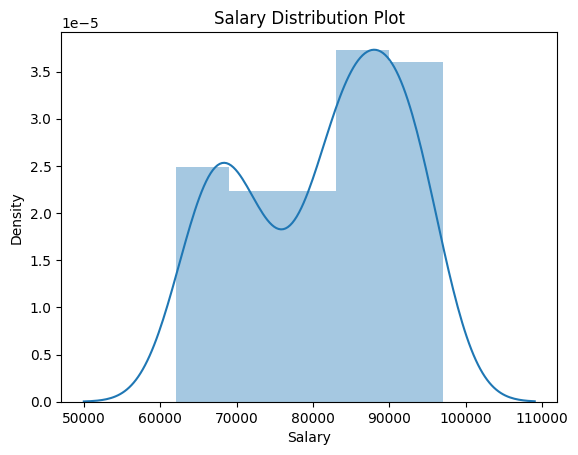

In [ ]:
sns.distplot(df_HRcost['Salary'])
plt.title('Salary Distribution Plot')
plt.show()

## To show the relationship b/w Salary and Experience

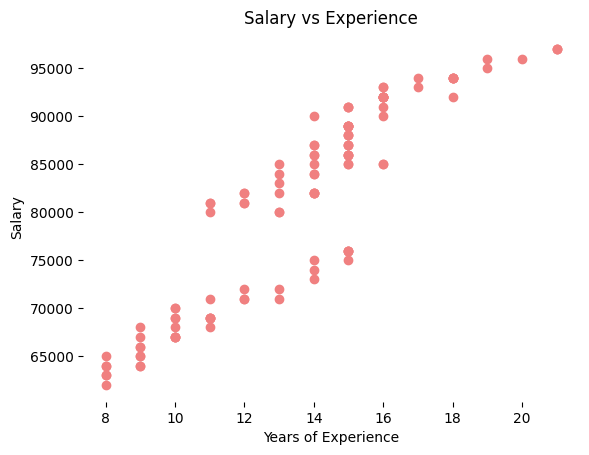

In [ ]:
plt.scatter(df_HRcost['YearsExperience'], df_HRcost['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

## Separating the variables into dependent and independent variable

In [ ]:
X = df_HRcost[['YearsExperience']]  # independent
y = df_HRcost['Salary']  # dependent

## To show training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## To show the Regression Model

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

## To Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 14469583.320145229


## To show model prediction

In [ ]:
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

## To show model visualization

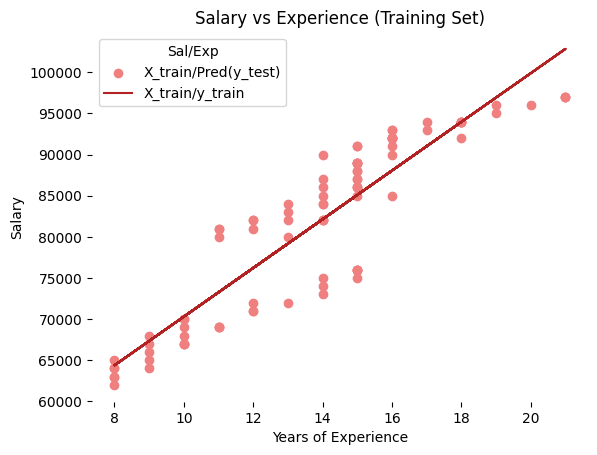

In [ ]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

## To show the result of the intercept

In [ ]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [2958.83727085]
Intercept: 40710.871241326124


In [ ]:
from sklearn.metrics import r2_score

r2_score_test = r2_score(y_test, y_pred_test)

print("R-squared (test):", r2_score_test)


R-squared (test): 0.835622351579332


# MULTIPLE REGRESSION MODEL

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

## To show the Descriptive Statistics

In [ ]:
df_HRcost.describe()

,Staff ID,Age,Purchased,YearsExperience,Salary,R&D Cost,HR Cost,Marketing Cost,Profit,TV,Radio,Newspaper,Sales
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1063.000000,36.113043,0.417391,13.634783,81095.652174,17495.652174,11234.782609,23086.956522,65634.782609,11.178261,5.589130,9.476087,7.858261
std,33.341666,4.605042,0.495287,3.087412,10349.145158,3981.038199,1522.235399,3719.472745,7261.204814,1.513378,0.756689,1.269572,0.898340
min,1006.000000,27.000000,0.000000,8.000000,62000.000000,11000.000000,8500.000000,16000.000000,52000.000000,8.500000,4.250000,7.250000,6.000000
25%,1034.500000,33.000000,0.000000,11.000000,71000.000000,13000.000000,9500.000000,19000.000000,59000.000000,9.500000,4.750000,8.500000,7.000000
50%,1063.000000,36.000000,0.000000,14.000000,84000.000000,18000.000000,11000.000000,24000.000000,66000.000000,11.000000,5.500000,9.500000,8.100000
75%,1091.500000,39.000000,1.000000,15.000000,89500.000000,21000.000000,12500.000000,26000.000000,71500.000000,12.500000,6.250000,10.500000,8.600000
max,1120.000000,46.000000,1.000000,21.000000,97000.000000,25000.000000,14000.000000,30000.000000,79000.000000,14.000000,7.000000,12.000000,9.500000


## To show the distribution plot for profit

<ipython-input-1275-9a37e7610e07>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_HRcost['Profit'])


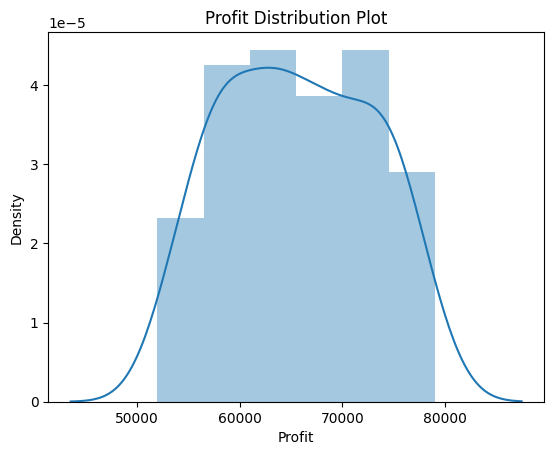

In [ ]:
plt.title('Profit Distribution Plot')
sns.distplot(df_HRcost['Profit'])
plt.show()

## To show distribution plot of profit vs Marketing cost

<Axes: >

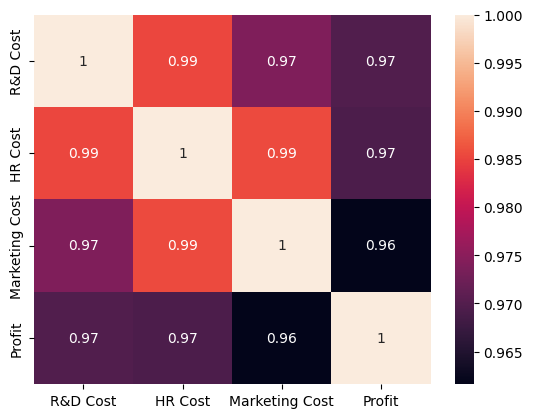

In [ ]:
sns.heatmap(df_HRcost[['R&D Cost', 'HR Cost', 'Marketing Cost', 'Profit']].corr(), annot=True)

## Separating the variables into dependent and independent variable

In [ ]:
X = df_HRcost[['R&D Cost', 'HR Cost', 'Marketing Cost']]  # independent
y = df_HRcost['Profit']  # dependent

## To show training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## To show Regression Model

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## To show model prediction

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [0.73780193 1.78526644 0.40086508]
Intercept: 23461.895100064685


## To Evaluate Model

In [ ]:
from sklearn.metrics import r2_score

r2_score_test = r2_score(y_test, y_pred)

print("R-squared (test):", r2_score_test)

R-squared (test): 0.9123140838057157


In [ ]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3076134.6554509057


# POLYNOMIAL REGRESSION

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Distribution Plot for Profit

<ipython-input-1285-9a37e7610e07>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_HRcost['Profit'])


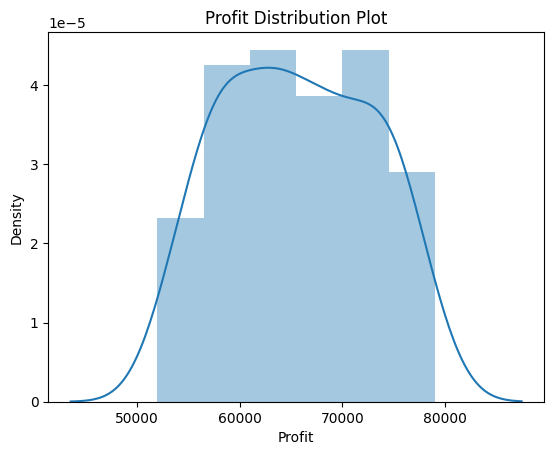

In [ ]:
plt.title('Profit Distribution Plot')
sns.distplot(df_HRcost['Profit'])
plt.show()

## Distribution for Scatter Plot

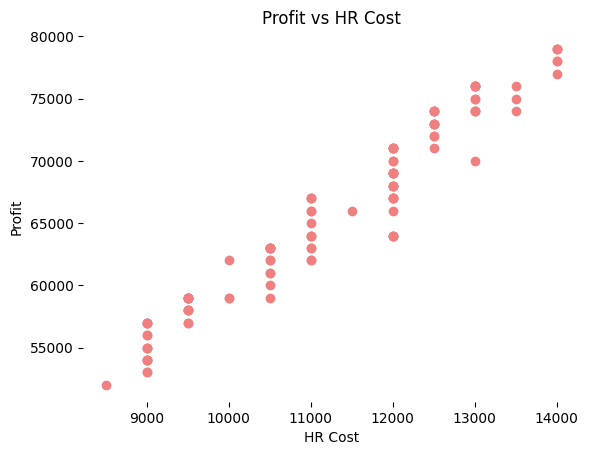

In [ ]:
plt.scatter(df_HRcost['HR Cost'], df_HRcost['Profit'], color = 'lightcoral')

plt.title('Profit vs HR Cost')

plt.xlabel('HR Cost')

plt.ylabel('Profit')

plt.box(False)

## Dependent and Independent Variables

In [ ]:
X = df_HRcost[['HR Cost']]  # independent
y = df_HRcost['Profit']  # dependent

## To show Regression Model

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)

LinearRegression()

## To Visualize the Model

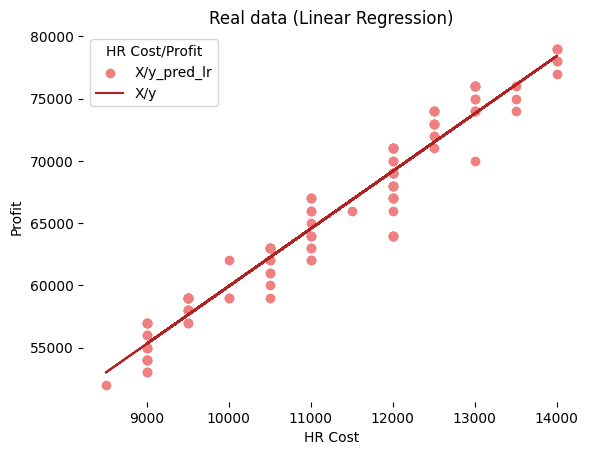

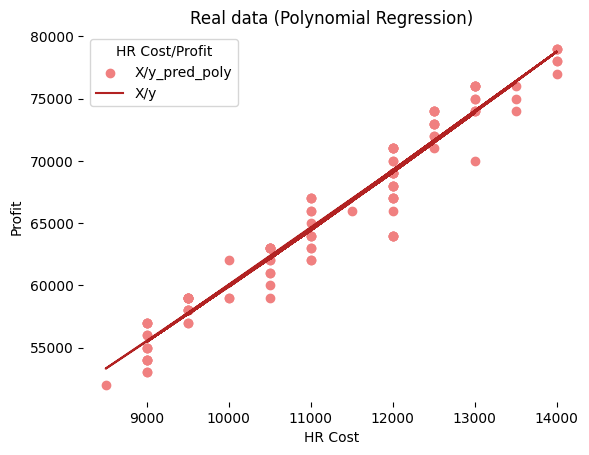

In [ ]:
# Visualize real data with linear regression
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr.predict(X), color = 'firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('HR Cost')
plt.ylabel('Profit')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'HR Cost/Profit', loc='best', facecolor='white')
plt.box(False)
plt.show()

# Visualize real data with polynomial regression
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('HR Cost')
plt.ylabel('Profit')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'HR Cost/Profit', loc='best', facecolor='white')
plt.box(False)
plt.show()


## To Evaluate the Model

In [ ]:
y_pred = lr_2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 63738709.98382301


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score

r2_score_test = r2_score(y_test, y_pred)

print("R-squared (test):", r2_score_test)

R-squared (test): -0.8168863876194832


# K NEAREST NEIGHBOR REGRESSION

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
df_HRcost.head()

,Staff ID,Age,Purchased,YearsExperience,Salary,R&D Cost,HR Cost,Marketing Cost,Profit,TV,Radio,Newspaper,Sales
0,1006,31,0,11,80000,16000,10000,21000,62000,10.5,5.25,8.50,7.0
1,1007,29,0,8,62000,11000,8500,16000,52000,8.5,4.25,7.25,6.0
2,1008,36,0,13,85000,19000,11500,24000,66000,11.5,5.75,9.50,8.0
3,1009,32,1,10,68000,13000,9500,19000,57000,9.5,4.75,8.00,6.7
4,1010,40,1,14,90000,21000,12500,26000,72000,12.5,6.25,10.50,8.5


<ipython-input-1295-a29ecc8aee6a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_HRcost['Purchased'])


<Axes: xlabel='Purchased', ylabel='Density'>

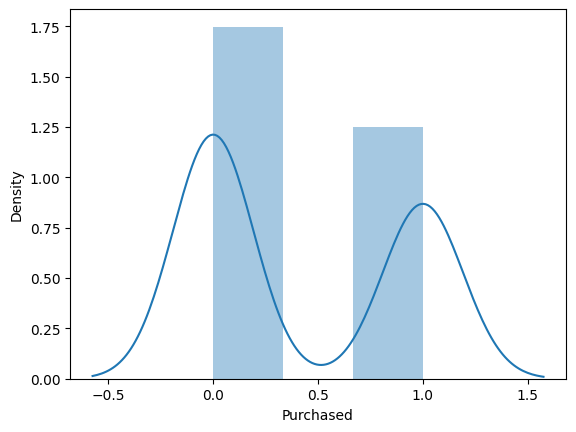

In [ ]:
# Distribution plot
sns.distplot(df_HRcost['Purchased'])

<Axes: >

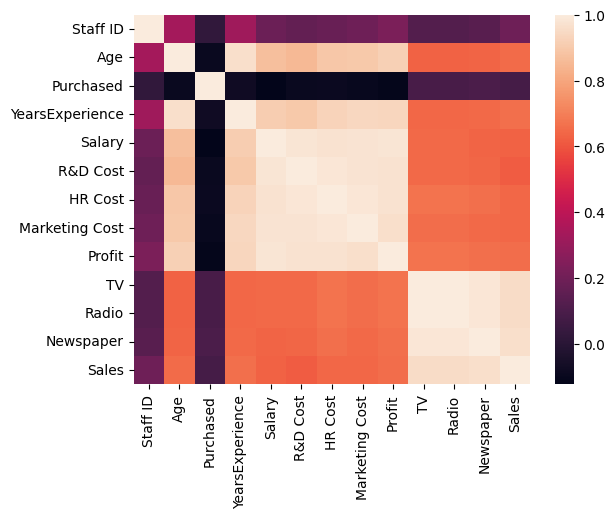

In [ ]:
# Correlation matrix
df_HRcost.corr()
sns.heatmap(df_HRcost.corr())

In [ ]:
# Split data into dependent/independent variables
X = df_HRcost[['Age', 'Salary']]
y = df_HRcost['Purchased']

In [ ]:
# Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = True)

In [ ]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Train K-Nearest Neighbour model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
accuracy_score(y_test, y_pred)

Classification Report: 
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.11      0.14      0.12         7

    accuracy                           0.39        23
   macro avg       0.34      0.32      0.33        23
weighted avg       0.43      0.39      0.41        23



0.391304347826087

## To Evaluate the Model

In [ ]:
y_pred = classifier.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.6086956521739131


# LOGISTICS REGRESSION

## Import Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

<ipython-input-1305-b16b5a68b660>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_HRcost['Purchased'])


<Axes: xlabel='Purchased', ylabel='Density'>

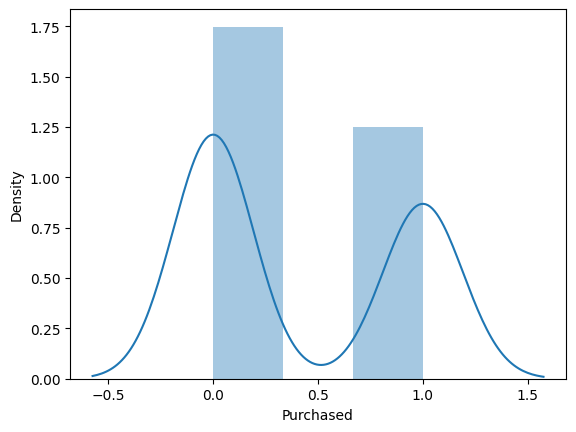

In [ ]:
# Salary distribution
sns.distplot(df_HRcost['Purchased'])

<Axes: >

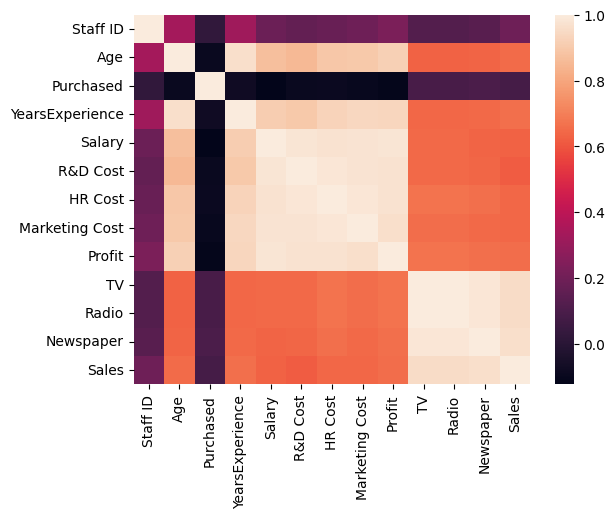

In [ ]:
# Correlation matrix
df_HRcost.corr()
sns.heatmap(df_HRcost.corr())

In [ ]:
# Split data into dependent/independent variables
X = df_HRcost[['Age', 'Salary']]
y = df_HRcost['Purchased']

In [ ]:
# Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Classifier
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)


0.7586206896551724

## To Evaluate the Model

In [ ]:
y_pred = classifier.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2413793103448276


# Non Linear Regression

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
df_HRcost.drop(columns = ['Staff ID'], inplace=True)

<ipython-input-1315-b16b5a68b660>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_HRcost['Purchased'])


<Axes: xlabel='Purchased', ylabel='Density'>

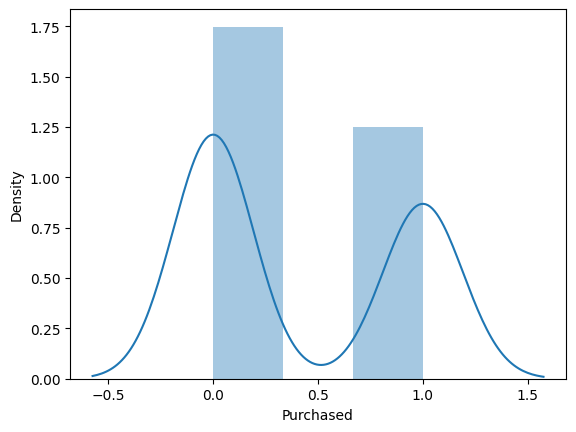

In [ ]:
# Salary distribution
sns.distplot(df_HRcost['Purchased'])

<Axes: >

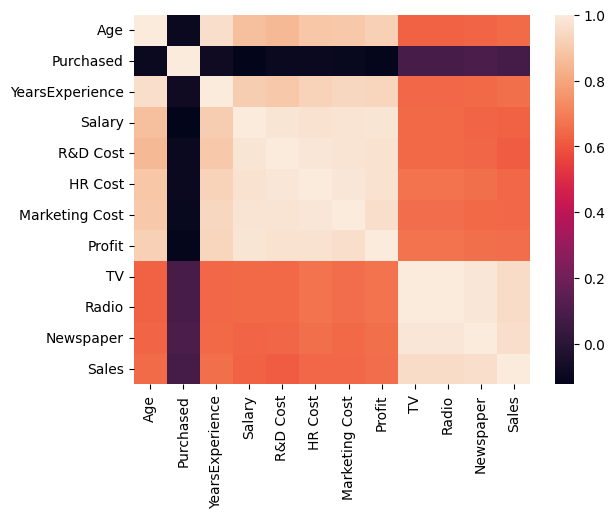

In [ ]:
# Correlation matrix
df_HRcost.corr()
sns.heatmap(df_HRcost.corr())

In [ ]:
# Split data into dependent/independent variables
X = df_HRcost[['Age', 'Salary']]
y = df_HRcost['Purchased']

In [ ]:
# Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.4482758620689655

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
accuracy_score(y_test, y_pred)

Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.55      0.58        20
           1       0.18      0.22      0.20         9

    accuracy                           0.45        29
   macro avg       0.40      0.39      0.39        29
weighted avg       0.48      0.45      0.46        29



0.4482758620689655

## To Evaluate the Model

In [ ]:
y_pred = classifier.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5517241379310345


# RIDGE AND LASSO REGRESSION

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = df_HRcost.drop(['Sales'], axis=1)
y = df_HRcost['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Ridge regression model
ridge = Ridge(alpha=1.0)

In [ ]:
#Fit the model
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
#Predict on the test data
y_pref_ridge = ridge.predict(X_test)

In [ ]:
#Lasso regression model
lasso = Lasso(alpha=1.0)

In [ ]:
#Fit the model
lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.340e-03, tolerance: 7.400e-03
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
#Predict on the test data
y_pref_lasso = lasso.predict(X_test)

In [ ]:
# Get coefficients from Ridge and Lasso
ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_

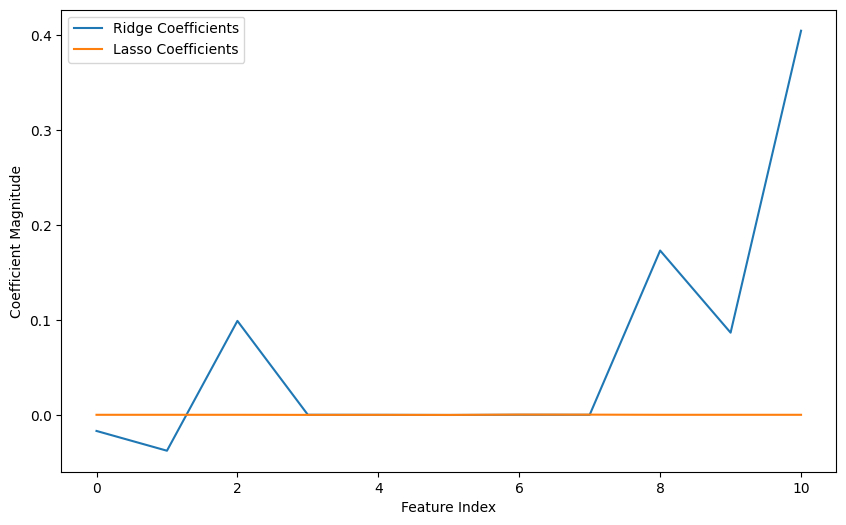

In [ ]:
# Plot the coefficients
plt.figure(figsize =(10, 6))
plt.plot(range(len(ridge_coefs)), ridge_coefs, label = "Ridge Coefficients")
plt.plot(range(len(lasso_coefs)), lasso_coefs, label = "Lasso Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Magnitude")
plt.legend()

## To Evaluate the Model

In [ ]:
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score

r2_score_test = r2_score(y_test, y_pred)

print("R-squared (test):", r2_score_test)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score

r2_score_test = r2_score(y_test, y_pred)

print("R-squared (test):", r2_score_test)

Mean Squared Error: 0.06809829750607857
R-squared (test): 0.9113975124681106
Mean Squared Error: 0.6779647164856027
R-squared (test): 0.1179021717229477
